## Import Library

In [1]:
!pip install deep_translator

import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from deep_translator import GoogleTranslator
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder,FunctionTransformer
from nltk.stem import WordNetLemmatizer
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout,Bidirectional
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import  ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.
import pickle
import tensorflow as tf
import random
from google.colab import files
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.6 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Data Loading

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aldofernandos","key":"0a9ea8d7ce192cbbd8c736a8dd0d05d4"}'}

In [3]:
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d suchintikasarkar/sentiment-analysis-for-mental-health --force
!unzip sentiment-analysis-for-mental-health.zip

Dataset URL: https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health
License(s): DbCL-1.0
  0% 0.00/11.1M [00:00<?, ?B/s]
100% 11.1M/11.1M [00:00<00:00, 1.19GB/s]
Archive:  sentiment-analysis-for-mental-health.zip
  inflating: Combined Data.csv       


In [4]:
df = pd.read_csv("/content/Combined Data.csv")

In [5]:
df

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...,...
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52681 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  52681 non-null  int64 
 1   statement   52681 non-null  object
 2   status      52681 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


In [7]:
df = df.dropna()

In [9]:
df['status'].value_counts()

,count
status,
Normal,16343
Depression,15404
Suicidal,10652
Anxiety,3841
Bipolar,2777
Stress,2587
Personality disorder,1077


<ipython-input-10-ff6fb7a65f17>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette=light_colors)


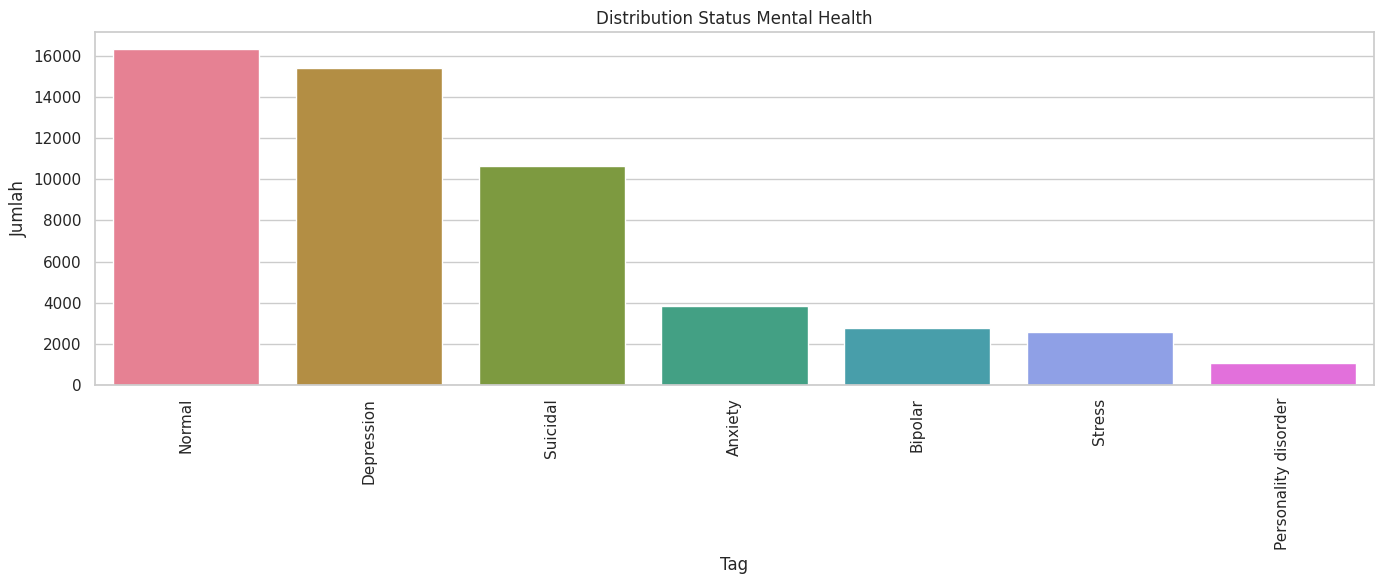

In [10]:
label_counts = df['status'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))

plt.figure(figsize=(14, 6))
sns.set(style='whitegrid')
sns.barplot(x=label_counts.index, y=label_counts.values, palette=light_colors)

plt.title('Distribution Status Mental Health')
plt.xlabel('Tag')
plt.ylabel('Jumlah')
plt.xticks(rotation=90, ha='center')  # ini solusi utamanya
plt.tight_layout()
plt.show()

## Data Preprocessing

In [27]:
clean_df = df.copy()
clean_df

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...,...
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [28]:
clean_df = clean_df.drop(columns="Unnamed: 0")

In [29]:
mapping_5class = {
    'Normal': 'Normal',
    'Depression': 'Depression',
    'Suicidal': 'Depression',
    'Anxiety': 'Anxiety',
    'Stress': 'Anxiety',
    'Bipolar': 'Bipolar',
    'Personality disorder': 'Bipolar'
}

clean_df['sentiment'] = df['status'].replace(mapping_5class)

In [31]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r"http\S+|www\S+|@\S+|#\S+", "", text)
        text = re.sub(r"[^a-z\s]", "", text)  # Remove punctuation/numbers
        words = text.split()
        words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
        return " ".join(words)
    return ""

# Casefolding function (convert text to lowercase)
def casefoldingText(text):
    if isinstance(text, str):
        return text.lower()
    return ""

# Function to fix slang words
def fix_slangwords(text):
    slang_dict = {
          "u": "you", "r": "are", "btw": "by the way", "gr8": "great", "lol": "laugh out loud",
        "omg": "oh my god", "idk": "I don't know", "bff": "best friend forever", "ty": "thank you",
        "smh": "shaking my head", "stfu": "shut the f*** up", "fml": "f*** my life", "g2g": "got to go",
        "tbh": "to be honest", "crybaby": "emotional", "overthinking": "overanalyzing",
        "feels": "feelings", "stressed out": "stress", "shook": "emotionally affected",
        "bipolar": "bi-polar", "heartbroken": "feeling broken", "feeling some type of way": "confused or overwhelmed",
        "tired": "fatigued or exhausted"
    }
    return ' '.join([slang_dict.get(word, word) for word in text.split()])

# Tokenizing function (split text into words)
def tokenizingText(text):
    if isinstance(text, str):
        return text.split()
    return []

# Function to filter stopwords
def filteringText(text):
    stop_words = set(stopwords.words('english'))  # Using English stopwords from nltk
    return [word for word in text if word not in stop_words]

# Function to join the tokens back into a sentence
def toSentence(tokens):
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
# Cleaning the text and storing it in the 'text_clean' column
clean_df['text_clean'] = clean_df['statement'].apply(clean_text)

# Lowercasing the text and storing it in the 'text_casefoldingText' column
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Replacing slang words with standard words and storing it in the 'text_slangwords' column
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Tokenizing the text and storing it in the 'text_tokenizingText' column
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Removing stopwords and storing the result in the 'text_stopword' column
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Joining the tokens back into a sentence and storing it in the 'text_final' column
clean_df['text_final'] = clean_df['text_stopword'].apply(toSentence)


In [50]:
clean_df

,statement,status,sentiment,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_final
0,oh my gosh,Anxiety,Anxiety,oh gosh,oh gosh,oh gosh,"[oh, gosh]","[oh, gosh]",oh gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,Anxiety,trouble sleeping confused mind restless heart ...,trouble sleeping confused mind restless heart ...,trouble sleeping confused mind restless heart ...,"[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ...",trouble sleeping confused mind restless heart ...
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,Anxiety,wrong back dear forward doubt stay restless re...,wrong back dear forward doubt stay restless re...,wrong back dear forward doubt stay restless re...,"[wrong, back, dear, forward, doubt, stay, rest...","[wrong, back, dear, forward, doubt, stay, rest...",wrong back dear forward doubt stay restless re...
3,I've shifted my focus to something else but I'...,Anxiety,Anxiety,ive shifted focus something else im still worried,ive shifted focus something else im still worried,ive shifted focus something else im still worried,"[ive, shifted, focus, something, else, im, sti...","[ive, shifted, focus, something, else, im, sti...",ive shifted focus something else im still worried
4,"I'm restless and restless, it's been a month n...",Anxiety,Anxiety,im restless restless month boy mean,im restless restless month boy mean,im restless restless month boy mean,"[im, restless, restless, month, boy, mean]","[im, restless, restless, month, boy, mean]",im restless restless month boy mean
...,...,...,...,...,...,...,...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety,Anxiety,nobody take seriously ive dealt depressionanxi...,nobody take seriously ive dealt depressionanxi...,nobody take seriously ive dealt depressionanxi...,"[nobody, take, seriously, ive, dealt, depressi...","[nobody, take, seriously, ive, dealt, depressi...",nobody take seriously ive dealt depressionanxi...
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety,Anxiety,selfishness dont feel good like dont belong wo...,selfishness dont feel good like dont belong wo...,selfishness dont feel good like dont belong wo...,"[selfishness, dont, feel, good, like, dont, be...","[selfishness, dont, feel, good, like, dont, be...",selfishness dont feel good like dont belong wo...
53040,Is there any way to sleep better? I can't slee...,Anxiety,Anxiety,way sleep better cant sleep night med didnt help,way sleep better cant sleep night med didnt help,way sleep better cant sleep night med didnt help,"[way, sleep, better, cant, sleep, night, med, ...","[way, sleep, better, cant, sleep, night, med, ...",way sleep better cant sleep night med didnt help
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety,Anxiety,public speaking tip hi give presentation work ...,public speaking tip hi give presentation work ...,public speaking tip hi give presentation work ...,"[public, speaking, tip, hi, give, presentation...","[public, speaking, tip, hi, give, presentation...",public speaking tip hi give presentation work ...


In [55]:
X = clean_df['text_final'].astype(str)
y = clean_df['sentiment'].astype(str)

In [56]:
# Tokenizing text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_seq, padding='post', maxlen=100)

# Convert the padded sequences into a Pandas DataFrame with column names
X_padded = pd.DataFrame(X_padded)

# Convert the labels to numeric values (Label Encoding)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)  # Encoding categorical labels to numeric

# If you want y_encoded as a DataFrame (optional)
y_encoded = pd.DataFrame(y_encoded, columns=['label'])  # Optionally, name the column



In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42)

print(f'Jumlah data latih: {len(X_train)}')
print(f'Jumlah data uji: {len(X_test)}')

Jumlah data latih: 42144
Jumlah data uji: 10537


## Modeling

### LSTM with Learning Rate 0.0005

In [58]:
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Buat model LSTM untuk klasifikasi emosi
def build_model(vocab_size, num_classes):
    model = models.Sequential([
        layers.Embedding(input_dim=vocab_size, output_dim=128),
        layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
        layers.Bidirectional(layers.LSTM(32)),
        layers.Dropout(0.5),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(
        optimizer=Adam(learning_rate=0.0005),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Contoh pemanggilan
model = build_model(vocab_size=10000, num_classes=5)

# Callback
checkpoint_cb = ModelCheckpoint("model_mental_health_finetuned.h5", save_best_only=True)
earlystop_cb = EarlyStopping(patience=5, restore_best_weights=True)

# Latih model (ganti X_train, y_train sesuai dengan variabel Anda)
model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.1,
    callbacks=[checkpoint_cb, earlystop_cb]
)

# Evaluasi
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Akurasi latih: {train_acc:.4f}")
print(f"Akurasi uji: {test_acc:.4f}")


Epoch 1/30
591/593 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7052 - loss: 0.8206

593/593 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.7056 - loss: 0.8195 - val_accuracy: 0.8403 - val_loss: 0.4208
Epoch 2/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8651 - loss: 0.3675

593/593 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.8652 - loss: 0.3675 - val_accuracy: 0.8738 - val_loss: 0.3571
Epoch 3/30
592/593 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9206 - loss: 0.2475

593/593 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9206 - loss: 0.2475 - val_accuracy: 0.8783 - val_loss: 0.3565
Epoch 4/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9384 - loss: 0.1980 - val_accuracy: 0.8800 - val_loss: 0.3789
Epoch 5/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9546 - loss: 0.1493 - val_accuracy: 0.8795 - val_loss: 0.3852
Epoch 6/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9676 - loss: 0.1156 - val_accuracy: 0.8752 - val_loss: 0.4986
Epoch 7/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9713 - loss: 0.1017 - val_accuracy: 0.8783 - val_loss: 0.4839
Epoch 8/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9783 - loss: 0.0794 - val_accuracy: 0.8771 - val_loss: 0.5345
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9413 - loss: 0.1841
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8795 - loss: 0.3466
Akurasi latih: 0.9354
Akurasi uji: 0.8776


## Inference

In [59]:

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# Simpan label encoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)


In [45]:
happy_data = clean_df[clean_df['sentiment'] == 'Bipolar']
print(happy_data)  # Menampilkan 5 baris pertama


                                               statement  \
45394  What birth control are you on? I tried an IUD ...   
45395  Hypersexuality I was diagnosed with bipolar un...   
45396  Meditation I have been using the free meditati...   
45397  Family question diagnosis - vent Start with th...   
45398  Unable to stop talking to myself- any ideas/ex...   
...                                                  ...   
51849  Could you change and get better through lots o...   
51851  How to not hurt peoples feelings I think I’m d...   
51852  Do you have goals? I realised that I never rea...   
51853  I feel like I’ve missed out on my teenage year...   
51854  did a bunch of dxm yesterday and I realized th...   

                     status sentiment  \
45394               Bipolar   Bipolar   
45395               Bipolar   Bipolar   
45396               Bipolar   Bipolar   
45397               Bipolar   Bipolar   
45398               Bipolar   Bipolar   
...                     ...      

In [49]:
import re
import pickle
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Pastikan sudah didownload
nltk.download('stopwords')
nltk.download('wordnet')

# === Load komponen ===
with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)
with open("label_encoder.pkl", "rb") as f:
    encoder = pickle.load(f)
model = load_model("model_mental_health_finetuned.h5")

# === Inisialisasi ===
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

slang_dict = {
    "u": "you", "r": "are", "btw": "by the way", "gr8": "great", "lol": "laugh out loud",
    "omg": "oh my god", "idk": "i don't know", "bff": "best friend forever", "ty": "thank you",
    "smh": "shaking my head", "stfu": "shut the f up", "fml": "f my life", "g2g": "got to go",
    "tbh": "to be honest", "crybaby": "emotional", "overthinking": "overanalyzing",
    "feels": "feelings", "stressed out": "stress", "shook": "emotionally affected",
    "bipolar": "bi-polar", "heartbroken": "feeling broken", "feeling some type of way": "confused or overwhelmed",
    "tired": "fatigued or exhausted"
}

# === Preprocessing lengkap seperti di preprocessing.py ===
def full_preprocess(text):
    if not isinstance(text, str):
        return ""

    text = text.lower()
    text = re.sub(r"http\S+|www\S+|@\S+|#\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)

    # Replace slang
    text = ' '.join([slang_dict.get(word, word) for word in text.split()])

    # Tokenizing + stopword removal + lemmatizing
    words = text.split()
    cleaned_words = [
        lemmatizer.lemmatize(word)
        for word in words if word not in stop_words
    ]
    return ' '.join(cleaned_words)

# === Inference fungsi ===
def predict_sentiment(user_input):
    cleaned = full_preprocess(user_input)
    seq = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(seq, maxlen=100, padding='post')
    pred = model.predict(padded, verbose=0)
    label = encoder.inverse_transform([np.argmax(pred)])[0]
    return label

# CLI testing
print("🧠 Deteksi Emosi Mental Health (Versi Preprocessing Lengkap)")
while True:
    user_input = input("Teks: ")
    if user_input.lower() == "exit":
        print("Sampai jumpa 🙏")
        break
    result = predict_sentiment(user_input)
    print(f"Label Emosi: {result}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


🧠 Deteksi Emosi Mental Health (Versi Preprocessing Lengkap)
Teks: People say I change moods too quickly. I'm either extremely happy or feel completely hopeless
Label Emosi: Depression
Teks: Yesterday I felt unstoppable, like I could conquer the world. Today, I can't even get out of bed
Label Emosi: Normal
Teks: I was so full of energy this morning, started five projects, but now I feel like I can't even move.
Label Emosi: Normal
Teks: I was so full of energy this morning, started five projects, but now I feel like I can't even move
Label Emosi: Normal
Teks: One day I feel like the king of the world, the next day I feel like disappearing.
Label Emosi: Depression
Teks: I feel amazing right now, but last week I was crying nonstop and couldn't explain why
Label Emosi: Normal
Teks: People say I change moods too quickly. I'm either extremely happy or feel completely hopeless
Label Emosi: Depression



KeyboardInterrupt

